In [20]:
import numpy as np

def algoritam(a,b,statistics,beta, nn_iter=50):
    for i in range(nn_iter):
        c=0.5*(a+b)
        fa=statistics(a, beta)
        fb=statistics(b, beta)
        fc=statistics(c, beta)
        if fa*fc>0:
            a=c
        elif fb*fc>0:
            b=c
    return c
    
def boseein(mu, beta):
  return np.sum(1/(np.exp(beta*(Ei - mu))-1)) - N_target

def weight(energy, T, mu):
    beta = 1./T
    return 1 / (np.exp(beta * (energy - mu)) - 1)


n_states = 200
Ei = np.array([])
for i in range(n_states):
    g_n = (int)((i+1)*(i+2)/2)
    en = np.ones(g_n) * (i + 3./2)
    Ei = np.append(Ei, en)

N_target=100000
T_c = 0.94 * N_target**(1./3)
T=0.5 * T_c
N0_theory = 1 - (T / T_c)**3
beta=1./T

a=0
b=1.5 - 1.E-10

Numerical condensate fraction: 0.8634134282271493
Theoretical condensate fraction: 0.875
0
1
2
3
4
5
6
7
8
9


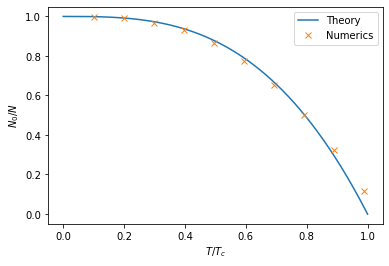

In [21]:
mu = algoritam(a,b,beta=beta,statistics=boseein)
s_states = weight(Ei, T, mu)
print(f"Numerical condensate fraction: {np.max(s_states) / N_target}")
print(f"Theoretical condensate fraction: {N0_theory}")

T_x = np.array([])
N0_y = np.array([])
n0_exp=np.array([])
Tcc=np.array([])
Ti=0;
while Ti <= T_c:
  Ti+=0.01
  T_x=np.append(T_x,Ti/T_c)
  N0_y=np.append(N0_y, 1 - (Ti / T_c)**3)

Tcc = np.linspace(0.1, 0.99, num = 10) * T_c
for i, Ti in enumerate(Tcc):

    beta=1/Ti
    print(i)
    mu = algoritam(a,b,beta=beta,statistics=boseein)
    s_states_g = weight(Ei, Ti, mu)
    n0_exp = np.append(n0_exp,np.max(s_states_g)/N_target)
  
import matplotlib.pyplot as plt
plt.plot(T_x,N0_y, label="Theory") 
plt.plot(Tcc/T_c,n0_exp,marker="x",ls='', label="Numerics") 
plt.xlabel("$T/T_c$")
plt.ylabel("$N_0/N$")
plt.legend(loc = "best")